In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

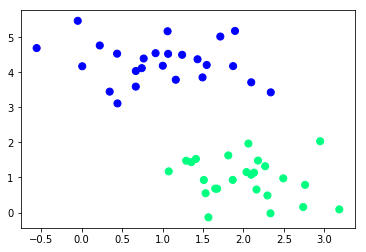

In [2]:
from sklearn.datasets.samples_generator import make_blobs # Importar datos

# Asignar variables dependientes e independientes

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

Un clasificador lineal va a intentar trazar una línea que separe los dos conjuntos de datos y así crear un modelo de clasificación. Se pueden crear múltiples líneas para separar los dos conjuntos

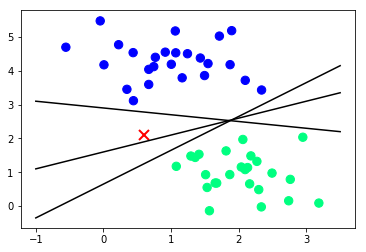

In [3]:
xfit = np.linspace(-1,3.5) # Crear un arreglo de npumeros entre -1 y 3.5
plt.scatter(X[:,0],X[:,1],c=y,s=70,cmap="winter")
plt.plot([0.6],[2.1],"x",color="red",markeredgewidth=2, markersize=10) # Agregar un punto cualquiera

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit,m*xfit + b, "-k")

## SVM: Maximizar el margen de separación

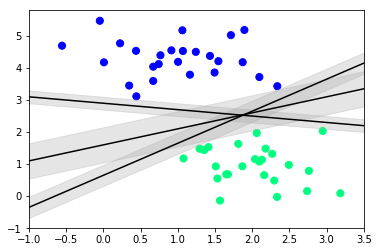

In [4]:
xfit = np.linspace(-1,3.5) # Crear un arreglo de npumeros entre -1 y 3.5
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="winter")

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.3)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # Importar el clasificador de máquinas de aprendizaje auotmático

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    """Dibujar el plano de separación para SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30) # Crea valores entre el rango de los ejes
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # Convierte cordenadas vectoriales en matriciales
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

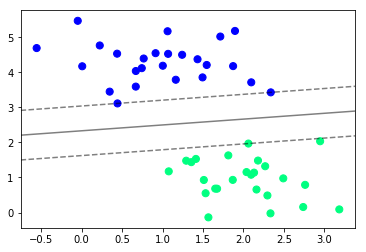

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

Los puntos que caen sobre el plano de separación son los vectores de soporte. Los demás puntos no tienen aporte sobre la función de costo

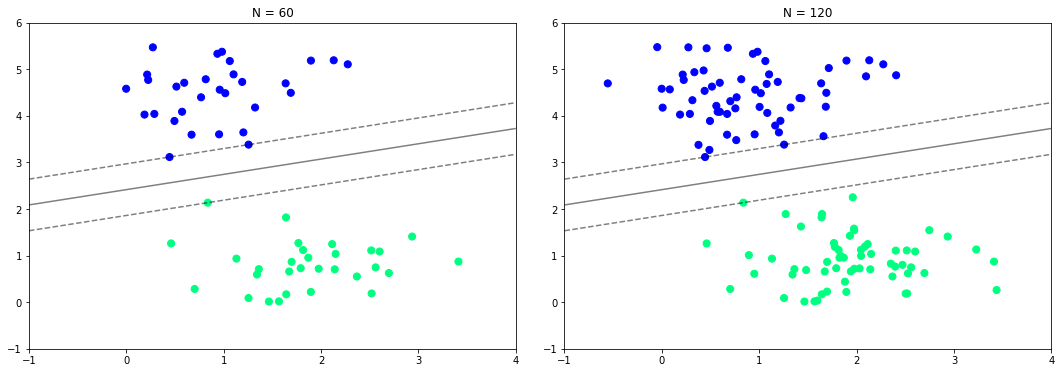

In [17]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [19]:
from ipywidgets import interact, fixed

interact(plot_svm, N=[10,50,150,200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 50, 150, 200), value=10), Output()), _dom_classes…

# Otro ejemplo de SVM

In [42]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
cancer = datasets.load_breast_cancer()

X = cancer["data"]
y = cancer["target"]
var = cancer.feature_names

In [33]:
# Particionar los datos en prueba y entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=109)

In [37]:
model = SVC(kernel = "linear")
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
predict = model.predict(X_test)
predict

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [45]:
# Evaluación utilizando métricas de ajuste

#confusion_matrix(y_test,predict)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

